
# New York City Taxi and Limousine Commission (TLC) Data Analysis

This notebook analyzes trip data from the New York City Taxi and Limousine Commission (TLC).  
**Goals**:  
1. Understand trip patterns, durations, and fares.
2. Identify key insights about passenger behavior and payment methods.
3. Apply statistical methods to uncover relationships between variables.

Let's dive into the data and explore these insights!


# Project Objective: 

## Develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered.

### First Milestone

Conduct exploratory data analysis on data for the TLC project. I’ll also use Power BI to create visuals for an executive summary to help non-technical stakeholders engage and interact with the data.

Methods
1. EDA and cleaning

2. Select and build visualization(s) type {Create plots to visualize relationships between relevant variables}

3. Share your results with the Automatidata team

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max.rows', 50)

In [131]:
taxi_data = pd.read_csv(r'C:\Users\HP\Downloads\Data analytics\Taxi\2017_Yellow_Taxi_Trip_Data.csv')
taxi_data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [132]:
taxi_data.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [133]:
# Adjusting column data types
taxi_data = taxi_data.astype({
    'VendorID': 'int64',
    'passenger_count': 'int64',
    'trip_distance': 'float',
    'RatecodeID': 'int64',
    'PULocationID': 'int64',
    'DOLocationID': 'int64',
    'payment_type': 'int64',
    'fare_amount': 'float',
    'extra': 'float',
    'mta_tax': 'float',
    'tip_amount': 'float',
    'tolls_amount': 'float',
    'improvement_surcharge': 'float',
    'total_amount': 'float'
})

taxi_data['tpep_pickup_datetime'] = pd.to_datetime(
    taxi_data['tpep_pickup_datetime'], 
    format='%m/%d/%Y %I:%M:%S %p'
)

taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(
    taxi_data['tpep_dropoff_datetime'], 
    format='%m/%d/%Y %I:%M:%S %p'
)

# Dropping unnecessary columns
taxi_data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Calculate the pick up hour and duration of each trip in minutes
taxi_data['ride_duration_minutes'] = ((
    taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60).astype(int)

taxi_data['pickup_hour'] = taxi_data['tpep_pickup_datetime'].dt.hour % 12
taxi_data['pickup_hour'] = taxi_data['pickup_hour'].replace(0, 12)  # Replace 0 with 12
taxi_data['pickup_period'] = taxi_data['tpep_pickup_datetime'].dt.strftime('%p')
taxi_data['pickup_day_of_week'] = taxi_data['tpep_pickup_datetime'].dt.day_name().str.slice(stop=3)
taxi_data['month'] = taxi_data['tpep_pickup_datetime'].dt.month_name()

taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ride_duration_minutes,pickup_hour,pickup_period,pickup_day_of_week,month
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14,8,AM,Sat,March
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26,2,PM,Tue,April
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7,7,AM,Fri,December
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30,1,PM,Sun,May
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16,11,PM,Sat,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3,5,PM,Fri,February
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40,4,PM,Sun,August
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4,2,PM,Mon,September
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11,12,PM,Sat,July


In [134]:
#A function for catergorising each ride by time of day (morning, afternoon, evening, night and midnight) 

def categorize_time_of_day(hour, period):
    if period == 'AM':
        if 5 <= hour < 12:
            return 'Morning'
        else:  # 12 AM - 4:59 AM
            return 'Midnight'
    elif period == 'PM':
        if 1 <= hour < 5 or hour == 12:
            return 'Afternoon'
        elif 5 <= hour < 9:
            return 'Evening'
        elif 9<= hour < 12:  # 9 PM - 11:59 PM
            return 'Night'
    else:
        return 'Not_captured'

# Apply the function to create the 'time_of_day' column
taxi_data['time_of_day'] = taxi_data.apply(
    lambda row: categorize_time_of_day(row['pickup_hour'], row['pickup_period']),
    axis=1
)

In [135]:
#Rearrange the order of the columns
new_order = ['VendorID', 'time_of_day', 'passenger_count', 'trip_distance','ride_duration_minutes',
             'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID','payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge',
             'total_amount','pickup_hour','pickup_day_of_week','pickup_period','month',
             'tpep_pickup_datetime','tpep_dropoff_datetime']
taxi_data = taxi_data[new_order]

# Convert the column to a categorical type with the custom order
custom_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
taxi_data['pickup_day_of_week'] = pd.Categorical(taxi_data['pickup_day_of_week'], categories=custom_order, ordered=True)

taxi_data

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime
0,2,Morning,6,3.34,14,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,8,Sat,AM,March,2017-03-25 08:55:43,2017-03-25 09:09:47
1,1,Afternoon,1,1.80,26,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,2,Tue,PM,April,2017-04-11 14:53:28,2017-04-11 15:19:58
2,1,Morning,1,1.00,7,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7,Fri,AM,December,2017-12-15 07:26:56,2017-12-15 07:34:08
3,2,Afternoon,1,3.70,30,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,1,Sun,PM,May,2017-05-07 13:17:59,2017-05-07 13:48:14
4,2,Night,1,4.37,16,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,11,Sat,PM,April,2017-04-15 23:32:20,2017-04-15 23:49:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,Evening,3,0.61,3,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,5,Fri,PM,February,2017-02-24 17:37:23,2017-02-24 17:40:39
22695,2,Afternoon,1,16.71,40,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,4,Sun,PM,August,2017-08-06 16:43:59,2017-08-06 17:24:47
22696,2,Afternoon,1,0.42,4,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,2,Mon,PM,September,2017-09-04 14:54:14,2017-09-04 14:58:22
22697,2,Afternoon,1,2.36,11,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,12,Sat,PM,July,2017-07-15 12:56:30,2017-07-15 13:08:26


In [136]:
taxi_data.describe()

,VendorID,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,16.526984,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,6.945460
std,0.496838,1.285231,3.653171,61.994881,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,3.351237
min,1.000000,0.000000,0.000000,-16.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,1.000000
25%,1.000000,1.000000,0.990000,6.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,4.000000
50%,2.000000,1.000000,1.610000,11.000000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,7.000000
75%,2.000000,2.000000,3.060000,18.000000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,10.000000
max,2.000000,6.000000,33.960000,1439.000000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,12.000000


In [137]:
a = taxi_data[(taxi_data['trip_distance'] <= 0 ) | (taxi_data['ride_duration_minutes'] <= 0)]

print(f'A total of {len(a)} row fall under this category')
a.head()

A total of 237 row fall under this category


,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime
128,1,Morning,1,0.00,0,3,N,231,231,2,20.0,0.0,0.0,0.0,0.0,0.3,20.3,8,Thu,AM,June,2017-06-22 08:05:33,2017-06-22 08:05:40
161,2,Evening,1,0.23,0,2,N,132,132,2,52.0,0.0,0.5,0.0,0.0,0.3,52.8,8,Sat,PM,November,2017-11-11 20:16:16,2017-11-11 20:17:14
246,1,Evening,1,0.00,0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,8,Mon,PM,September,2017-09-18 20:50:53,2017-09-18 20:51:03
291,1,Evening,1,0.00,0,1,N,132,132,2,2.5,1.0,0.5,0.0,0.0,0.3,4.3,7,Wed,PM,October,2017-10-04 19:46:24,2017-10-04 19:46:50
314,2,Midnight,6,0.12,0,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,2,Wed,AM,December,2017-12-13 02:02:39,2017-12-13 02:03:08


    Noted and comfirmed the minimum of the following 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount') all have negative values,
    which is very much abnormal in their respective contents; most likely making it a formatting mistake.
    
    There are also rows with 0 values in trip_distance or ride_duration_minutes, yet have significant values or weird values
    under columns like fare_amount, total_amount etc

In [138]:
'''I assume that negative value under those columns is a mistake, so I picked out trip_distance to study as a sample study.
    Looking at the most related column to it (ride_duration_minutes) to find common patterns, 
    I checked for values that falls between 5 and 5.9 in (ride_duration_minutes) and confirmed my guesses.
    I was right, as tip_distance within that range are in the tenth, so I will just convert those negative numbers to
    a positive'''

taxi_data[(taxi_data['trip_distance'] < 5.9 ) & (taxi_data['trip_distance'] > 5)].head(5)

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime
81,2,Midnight,3,5.11,16,1,N,79,74,1,16.5,0.5,0.5,5.34,0.0,0.3,23.14,4,Sat,AM,October,2017-10-28 04:16:54,2017-10-28 04:33:06
172,2,Afternoon,1,5.27,26,1,N,234,151,2,22.0,0.0,0.5,0.00,0.0,0.3,22.80,3,Sun,PM,February,2017-02-12 15:37:16,2017-02-12 16:03:24
243,2,Evening,4,5.04,26,1,N,13,230,2,21.0,0.0,0.5,0.00,0.0,0.3,21.80,7,Sun,PM,September,2017-09-24 19:44:28,2017-09-24 20:10:47
270,1,Afternoon,2,5.20,16,1,N,223,93,3,18.5,0.0,0.5,0.00,0.0,0.3,19.30,1,Sun,PM,September,2017-09-03 13:52:44,2017-09-03 14:09:06
345,2,Evening,5,5.29,34,1,N,107,238,1,23.5,0.5,0.5,4.96,0.0,0.3,29.76,8,Fri,PM,March,2017-03-17 20:02:10,2017-03-17 20:36:45


In [139]:
#Firstly, handle the negative values

taxi_data[['fare_amount', 'extra', 
           'mta_tax', 'tip_amount',
           'tolls_amount', 'improvement_surcharge',
           'total_amount']] = taxi_data[['fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount',
                                         'improvement_surcharge', 'total_amount']].abs()

#Secondly, drop any row that zero(0) under trip_distance and ride_duration_minutes
taxi_data.drop(taxi_data[(taxi_data['trip_distance'] <= 0 ) | (
    taxi_data['ride_duration_minutes'] <= 0)].index,
               inplace = True)

In [140]:
#Check the descriptive statistics of the data again

taxi_data.describe()

,VendorID,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour
count,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000,22462.000000
mean,1.556941,1.644911,2.939854,16.696376,1.031208,162.291648,161.459487,1.331627,12.929589,0.333363,0.498664,1.822233,0.310099,0.299987,16.199270,6.946755
std,0.496758,1.287452,3.660129,62.298188,0.227170,66.575674,70.097593,0.489719,10.760849,0.460316,0.025808,2.420594,1.388380,0.002002,13.341651,3.352151
min,1.000000,0.000000,0.010000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,4.000000
50%,2.000000,1.000000,1.640000,11.000000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000,7.000000
75%,2.000000,2.000000,3.100000,18.000000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,10.000000
max,2.000000,6.000000,33.960000,1439.000000,5.000000,265.000000,265.000000,4.000000,200.010000,4.500000,0.500000,55.500000,19.100000,0.300000,258.210000,12.000000


###### I didn't drop the rows under 'passenger_count' because I feel reflects the 

In [141]:
#A function to round up number to x significant places
import math

def round_to_sig_figs(x, sig_figs):
    if x == 0:
        return 0  # Zero remains zero
    return round(x, -int(math.floor(math.log10(abs(x)))) + (sig_figs - 1))

In [142]:
#Samll calculation for rides taken in the norning, afternoon and evening
# The consant number - 8760; is the amount of hours in a year

hourly_rides_am = round_to_sig_figs(taxi_data[taxi_data['time_of_day'] == 'Morning'].shape[0] / 8760,2)
hourly_rides_pm = round_to_sig_figs(taxi_data[taxi_data['time_of_day'] == 'Afternoon'].shape[0] / 8760,2)
hourly_rides_pm2 = round_to_sig_figs(taxi_data[taxi_data['time_of_day'] == 'Evening'].shape[0] / 8760,2)
hourly_revenue = taxi_data.groupby('pickup_hour')['total_amount'].sum()

Morning:    6 - 11am 
Afternoon: 12 -  4pm 
Evening:    5 -  8pm 
Night:      9 - 11pm 
Midnight:  12 -  5am


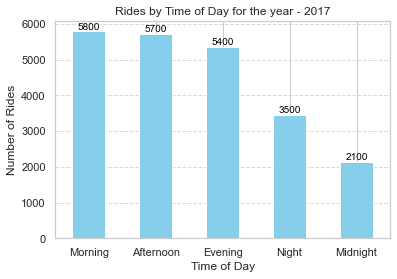

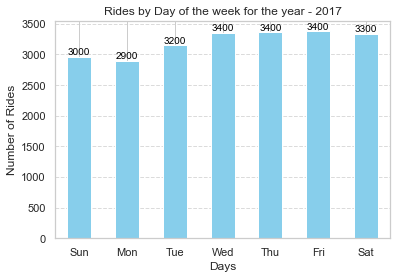

Average passenger per hour every Morning: 0.66
Average passenger per hour every Afternoon: 0.65
Average passenger per hour every Evening: 0.61


In [143]:
# Plot the bar chart for Number of rides by time of day

# Print the time ranges for context
print('Morning:    6 - 11am \nAfternoon: 12 -  4pm \nEvening:    5 -  8pm \nNight:      9 - 11pm \nMidnight:  12 -  5am')

ax = taxi_data['time_of_day'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Rides by Time of Day for the year - 2017')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


    
#Plot bar chart for the Number of rides per Day of the week
ax = taxi_data.sort_values('pickup_day_of_week')
ax = ax['pickup_day_of_week'].value_counts(sort = False).plot(kind='bar', color='skyblue')

plt.title('Rides by Day of the week for the year - 2017')
plt.xlabel('Days')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()
print(f'Average passenger per hour every Morning: {hourly_rides_am}')
print(f'Average passenger per hour every Afternoon: {hourly_rides_pm}')
print(f'Average passenger per hour every Evening: {hourly_rides_pm2}')


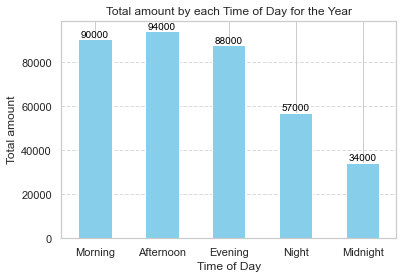

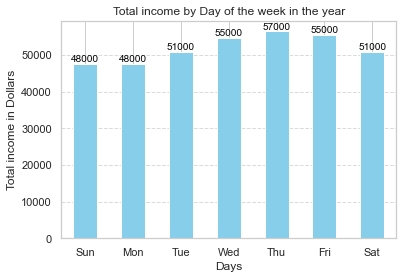

Average amount by the Time of Day 
Morning: $ 247.91 
Afternoon: $ 258.02 
Evening: $ 240.43 
Night: $ 156.57 
Midnight: $ 93.96


In [144]:
#Plot bar chart of Total amount made in each time of day
total_amt = taxi_data.groupby(['time_of_day'])['total_amount'].sum().apply(lambda x: int(x))
total_amt = total_amt.loc[['Morning','Afternoon','Evening','Night','Midnight']]
ax = total_amt.plot(kind='bar', color='skyblue')

plt.title('Total amount by each Time of Day for the Year')
plt.xlabel('Time of Day')
plt.ylabel('Total amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')    
    
plt.show()


#Plot bar chart for the Total money earn per Day of the week
ax = taxi_data.sort_values('pickup_day_of_week')
ax = ax.groupby('pickup_day_of_week')['total_amount'].sum().apply(lambda x: int(x)).plot(kind='bar', color='skyblue')

plt.title('Total income by Day of the week in the year')
plt.xlabel('Days')
plt.ylabel('Total income in Dollars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{round_to_sig_figs(p.get_height(),2)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

average_cash = (taxi_data.groupby('time_of_day').sum()/365)['total_amount'].apply(lambda x: round(x,2))
average_cash = average_cash.loc[['Morning','Afternoon','Evening','Night','Midnight']]

print(f'Average amount by the Time of Day \nMorning: $ {average_cash[0]} \nAfternoon: $ {average_cash[1]} \nEvening: $ {average_cash[2]} \nNight: $ {average_cash[3]} \nMidnight: $ {average_cash[4]}')


Based on the charts above it is safe to say 75% of the passengers acquire our services between 6am - 8pm and in these periods:

Morning pickups brought in a Total sum of 93000 Dollars for the calendar year, and an average of $255.93 daily

Afternoon pickups brought in a Total sum of 95000 Dollars for the calendar year, and an average of $261.12 daily

Evening pickups brought in a Total sum of 89000 Dollars for the calendar year, and an average of $243.68 daily

Night pickups brought in a Total sum of 58000 Dollars for the calendar year, and an average of $158.46 daily

Midnight pickups brought in a Total sum of 35000 Dollars for the calendar year, and an average of $95.16 daily


In [145]:
#Dummy dataset for more charts below to visualise more insights focused mainly on seasonality
dummy_1 = taxi_data.copy()
dummy_1['month_order'] = dummy_1['tpep_pickup_datetime'].dt.month
dummy_1['month'] = dummy_1['month'].str.slice(stop =3)
dummy_1['pickup_date'] = pd.to_datetime(taxi_data['tpep_pickup_datetime']).dt.day
dummy_1 =  dummy_1[['month_order','pickup_date','month','passenger_count','trip_distance',
                    'ride_duration_minutes','fare_amount','tip_amount', 'extra','total_amount',
                    'RatecodeID','DOLocationID']]

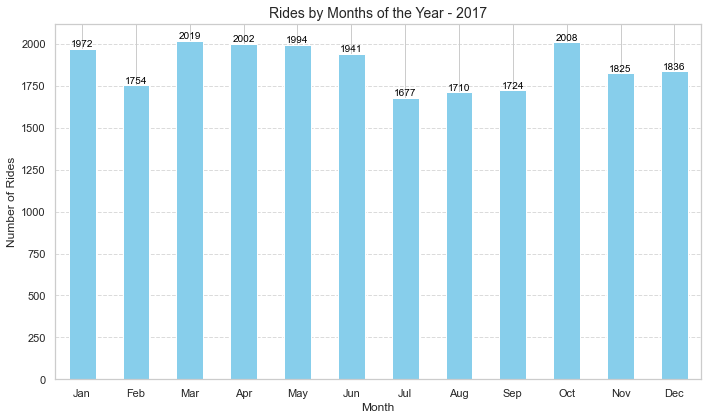

Average rides per day: 62.0
Average passenger per month: 1872.0


In [146]:
# Bar chart of Rides for each month of the Year
monthly_rides = dummy_1.groupby(['month', 'month_order']).size().reset_index(name='count')
monthly_rides = monthly_rides.sort_values('month_order')

# Plot
plt.figure(figsize=(10, 6))  
ax = monthly_rides.set_index('month')['count'].plot(kind='bar', color='skyblue')


plt.title('Rides by Months of the Year - 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

b = sum(monthly_rides['count'])
print(f'Average rides per day: {round_to_sig_figs(b /365, 2)}')

print(f'Average passenger per month: {round_to_sig_figs(b/12, 4)}')

### Trip Duration Analysis

#### The histogram shows that most trips are relatively short, with a small number of outliers indicating significantly longer durations.

#### This may suggest anomalies or unique cases like traffic incidents or long-distance trips.


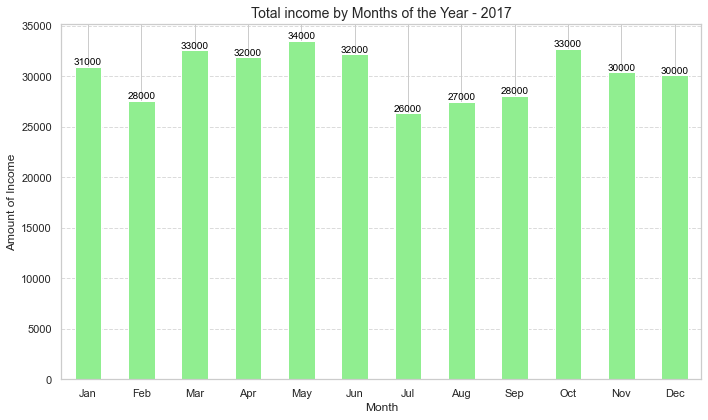

Average income per day: $ 996.9
Average distance travelled per month: 5503.0 miles


In [147]:
# Bar chart of Income for each month of the Year
monthly_income = dummy_1.groupby(['month', 'month_order'])['total_amount'].sum().reset_index(name='sum')
monthly_income = monthly_income.sort_values('month_order')

# Plot
plt.figure(figsize=(10, 6))  
bx = monthly_income.set_index('month')['sum'].plot(kind='bar', color='lightgreen')


plt.title('Total income by Months of the Year - 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount of Income', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in bx.patches:
    bx.annotate(f'{round_to_sig_figs(p.get_height(),2).astype(int)}',  # Text to display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

c = sum(monthly_income['sum'])
d = dummy_1['trip_distance'].sum()
print(f'Average income per day: $ {round(c /365, 2)}')
print(f'Average distance travelled per month: {round_to_sig_figs(d/12, 4)} miles')

<Figure size 1296x720 with 0 Axes>

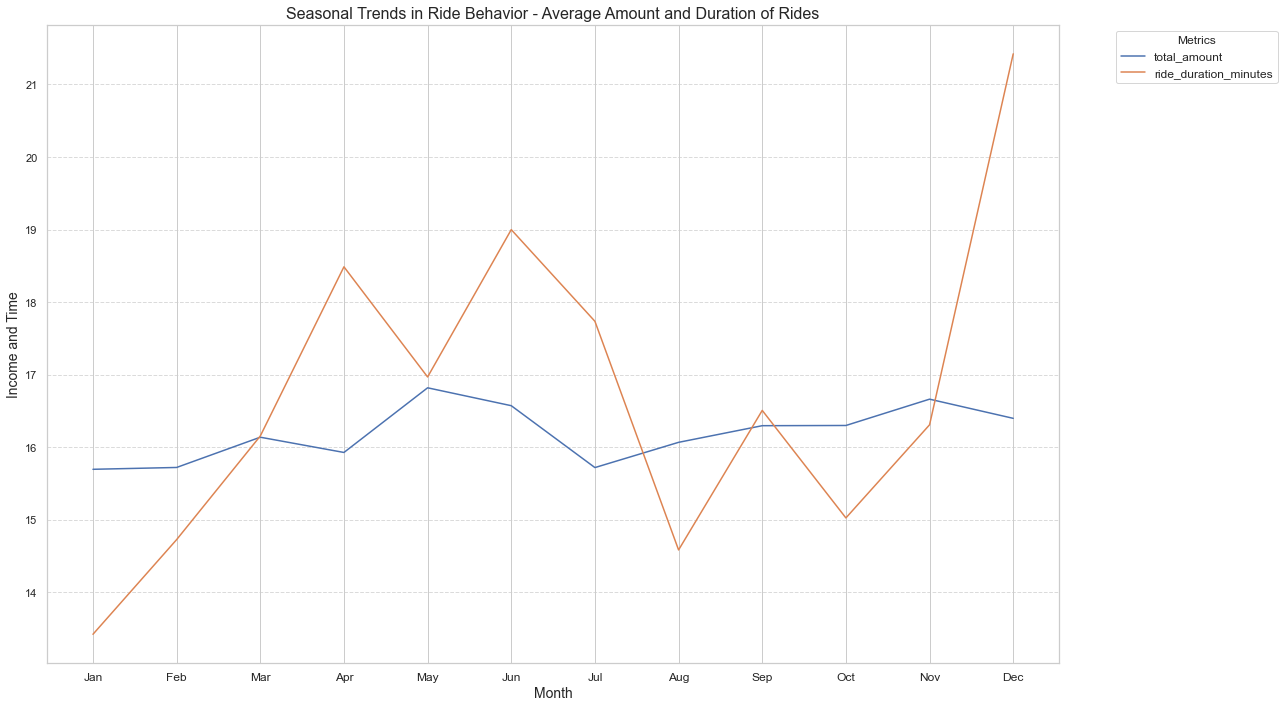

Average Trip Distance for Months with Total Amount Above Monthly Average:
   month trip_distance
4    Jan    6.49 miles
3    Feb    6.39 miles
7    Mar    6.74 miles
0    Apr    6.59 miles
8    May    6.87 miles
6    Jun    6.81 miles
5    Jul    5.99 miles
1    Aug    6.74 miles
11   Sep    6.71 miles
10   Oct    6.61 miles
9    Nov    6.55 miles
2    Dec    6.72 miles


In [148]:
# Grouping by month and calculating averages for analysis
seasonal_data = (
    dummy_1.groupby(['month', 'month_order'])[['total_amount', 'ride_duration_minutes', 'trip_distance']]
    .mean()
    .sort_values('month_order')
)

# Plotting seasonal trends
plt.figure(figsize=(18, 10))  # Make plot larger for better readability
ax = seasonal_data[['total_amount', 'ride_duration_minutes']].plot(kind='line', figsize=(18, 10))

# Adjusting aesthetics
plt.title('Seasonal Trends in Ride Behavior - Average Amount and Duration of Rides', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Income and Time', fontsize=14)
plt.xticks(ticks=range(len(seasonal_data)), labels=seasonal_data.index.get_level_values('month'), rotation=0, fontsize=12)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # Legend outside plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Finding the average distance of trip of every passager paying more than the average total amount per month
monthly_avg_total = dummy_1.groupby('month')['total_amount'].mean().reset_index()
monthly_avg_total.columns = ['month', 'avg_total_amount']
dummy_1 = dummy_1.merge(monthly_avg_total, on='month')

above_avg_trips = dummy_1[dummy_1['total_amount'] > dummy_1['avg_total_amount']]

average_trip_distance = above_avg_trips.groupby(['month', 'month_order'])['trip_distance'].mean().reset_index()
average_trip_distance = average_trip_distance.sort_values('month_order')

average_trip_distance['trip_distance'] = average_trip_distance['trip_distance'].apply(lambda x: f"{x:.2f} miles")

# Display the result
average_trip_distance = average_trip_distance[['month', 'trip_distance']]
print("Average Trip Distance for Months with Total Amount Above Monthly Average:")
print(average_trip_distance)


The month of March, October, April and May are the months with the most rides representively, each holding a total amount of rides of atleast 2000 rides.
From the line graph above, there are a few interesting things to speak of;

1. From March to April, the total amount of income generated seems to decline, with a significant increase of duration of rides(by minutes) during that period.


2. Come in May, the duration of rides steadly decrease while the amount of income generated climbs up; maintaining somewhat of a stable income through June, before steadly dropping as July approaches.


3. The months (March and October) seem to be the two seperate period of the year when the amount of rides increases significantly without the concern of the previous month performance. 


4. Starting June, the duration of rides makes a boorish trend to November; when it spikes up without any pull back till December. Making November and December the months with the highest duration of rides despite 8th and 7th position in term of total number of ride per month.

In [149]:
#I will dive into each month(March, October, April and May) to find out the top 3 Drop-off location
#and the Rate Code in Effect at the end of the trip, of all the Total income and tip amount above the average

In [150]:
# Identifying RatecodeID and DOlocationID with above-average Total Amount and Tip Amount in the dataset
avg_total_amount = dummy_1['total_amount'].mean()
avg_tip_amount = dummy_1['tip_amount'].mean()

ratecode_doloc_above_avg = dummy_1[
    (dummy_1['total_amount'] > avg_total_amount) & (dummy_1['tip_amount'] > avg_tip_amount)]

In [151]:
#This dataset is for Power Bi for visualising the data with total_amount and tip_amount above their average
ratecode_doloc_above_avg

,month_order,pickup_date,month,passenger_count,trip_distance,ride_duration_minutes,fare_amount,tip_amount,extra,total_amount,RatecodeID,DOLocationID,avg_total_amount
0,3,25,Mar,6,3.34,14,13.0,2.76,0.0,16.56,1,231,16.137519
3,3,5,Mar,2,18.90,36,52.0,14.58,0.0,72.92,2,132,16.137519
12,3,17,Mar,2,11.20,22,31.5,6.56,0.5,39.36,1,180,16.137519
16,3,31,Mar,3,9.67,31,31.0,8.08,0.5,40.38,1,232,16.137519
18,3,18,Mar,2,4.10,19,17.5,3.75,0.5,22.55,1,232,16.137519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22437,9,10,Sep,1,4.60,16,16.0,3.46,0.5,20.76,1,142,16.296305
22438,9,4,Sep,1,2.70,17,13.5,2.86,0.0,17.16,1,186,16.296305
22449,9,13,Sep,1,2.74,24,16.0,3.56,1.0,21.36,1,262,16.296305
22451,9,18,Sep,1,8.80,29,28.5,4.00,0.5,33.80,1,225,16.296305


In [152]:
def get_top_dolocations_by_ratecode(data, month=None):
    """
    Get the top 3 DOLocationID for each RatecodeID based on size.
    
    Parameters:
        data (DataFrame): The dataset containing ride information.
        month (str): Optional. Filter the dataset for a specific month (e.g., 'Jan', 'Feb').
        
    Returns:
        DataFrame: A DataFrame with the top 3 DOLocationID for each RatecodeID.
    """
    if month:
        filtered_data = data[data['month'] == month]
    else:
        filtered_data = data
    
    # Group by RatecodeID and DOLocationID and get the size
    grouped = (
        filtered_data.groupby(['RatecodeID', 'DOLocationID']).size()
        .reset_index(name='count')
    )
    
    grouped = grouped.sort_values(['RatecodeID', 'count'], ascending=[True, False])
    
    # Get the top 3 DOLocationID for each RatecodeID
    top_dolocations = (
        grouped.groupby('RatecodeID').head(3).reset_index(drop=True)
    )
    
    return top_dolocations


#Form a small table with the first three location on the last column
mar_result = get_top_dolocations_by_ratecode(dummy_1, month='Mar').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

oct_result = get_top_dolocations_by_ratecode(dummy_1, month='Oct').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

apr_result = get_top_dolocations_by_ratecode(dummy_1, month='Apr').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

may_result = get_top_dolocations_by_ratecode(dummy_1, month='May').groupby('RatecodeID').apply(
            lambda x: ", ".join(x['DOLocationID'].astype(str))).reset_index('RatecodeID')

In [153]:
a  = mar_result.iloc[0,1]
b = oct_result.iloc[0,1]
c = apr_result.iloc[0,1]
d = may_result.iloc[0,1]

print(f"For the month of March, the three most reoccuring Dropoff location are ID:[{a}].\n" + 
      f"For the month of October;  ID[{b}].\n" +
      f"For the month of April;    ID[{c}].\n" +
      f"For the month of October;  ID[{d}].\n" +
      "With the Effect of the Standard Rate during dropoff for all for the locations")

For the month of March, the three most reoccuring Dropoff location are ID:[236, 170, 237].
For the month of October;  ID[236, 161, 237].
For the month of April;    ID[236, 161, 237].
For the month of October;  ID[142, 237, 161].
With the Effect of the Standard Rate during dropoff for all for the locations


In [154]:
#Show the frequency of all RateCodeID for rides at the time of dropoff

mar_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='Mar').groupby(
    ['RatecodeID','DOLocationID']).sum().reset_index(['RatecodeID','DOLocationID'])
mar_result_freq['month'] = 'March'

oct_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='Oct').groupby(
    ['RatecodeID','DOLocationID']).sum().reset_index(['RatecodeID','DOLocationID'])
oct_result_freq['month'] = 'October'

apr_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='Apr').groupby(
    ['RatecodeID','DOLocationID']).sum().reset_index(['RatecodeID','DOLocationID'])
apr_result_freq['month'] = 'April'

may_result_freq = get_top_dolocations_by_ratecode(dummy_1, month='May').groupby(
    ['RatecodeID','DOLocationID']).sum().reset_index(['RatecodeID','DOLocationID'])
may_result_freq['month'] = 'May'

In [155]:
#Creating a table for the Drop-offs visit for at least 10 times and their rate code in effect
dropoff_rate_and_count = pd.concat(
    [mar_result_freq,  apr_result_freq, may_result_freq, oct_result_freq])

dropoff_rate_and_count = dropoff_rate_and_count[dropoff_rate_and_count['count'] >= 10].reset_index(drop = True)

dropoff_rate_and_count

,RatecodeID,DOLocationID,count,month
0,1,170,68,March
1,1,236,71,March
2,1,237,67,March
3,2,132,15,March
4,1,161,76,April
5,1,236,90,April
6,1,237,67,April
7,2,132,16,April
8,1,142,69,May
9,1,161,65,May


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Second Milestone

#### Population question :- Customers who use a Credit card pay higher fare amounts than those who use Cash? 

Simulate a Hypothesis test (A/B Testing):

The relationship between fare amount and payment type. 

Test the hypothesis that customers who use a credit card pay higher fare amounts.

Should you conclude that there is a statistically significant relationship between credit card payment and fare amount, discuss what the next steps should be: what are your thoughts on strategies our team could implement to encourage customers to pay with credit card?

##### The Null hypothesis is: There's no difference in average fare for customers that pay with cash or credit card.

##### The Alternative hypothesis: There's a significant difference in the average fare for customers that pay with cash or credit card.

##### Significant level (S.I):  5% (which is standard by tradition)
    
##### Since it's the aims to compare two samples mean and their population's standard deviation is unknown; I will use a T-test. Even if their sample size is more than 30

##### Lastly, following the assumption rules of hypo. testing, I will use Chi Test of Independence to test if the two variables are dependent or not - (They should not be independent)


In [156]:
taxi_data[['payment_type','fare_amount']].describe()

,payment_type,fare_amount
count,22462.000000,22462.000000
mean,1.331627,12.929589
std,0.489719,10.760849
min,1.000000,0.000000
25%,1.000000,6.500000
50%,1.000000,9.500000
75%,2.000000,14.500000
max,4.000000,200.010000


In [157]:
from scipy.stats import chi2_contingency

chi2, p, dop, expected = chi2_contingency(taxi_data[['payment_type','fare_amount']])

if p < 0.05:
    print("There is strong evidence of association, so you 'reject the null hypo.' and can not perform a t-test on the two samples")
    
elif p > 0.05:
    print("\n There is no evidence of association, so you 'fail to reject the null hypo', it is alright to use a t-test on the two samples. \n")


 There is no evidence of association, so you 'fail to reject the null hypo', it is alright to use a t-test on the two samples. 



In [158]:
# Credit card is assigned 2 and Cash is assigned 1, under payment_type

credit_card = taxi_data[taxi_data['payment_type'] == 1]['fare_amount']
cash = taxi_data[taxi_data['payment_type'] == 2]['fare_amount']


sta , p = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

if p < 0.05:
    print('''\n Based on the p-value, we will 'reject the null hypo.' and, affirm that the difference between the passengers that pay with credit card and those with cash is doesn't occuur by chance alone. \n''')
    
if p > 0.05:
    print('''\n Based on the p-value, we will ' fail to reject the null hypo.' and, affirm that the difference between the passengers that pay with credit card and those with cash is does occuur by chance indeed. \n''')


 Based on the p-value, we will 'reject the null hypo.' and, affirm that the difference between the passengers that pay with credit card and those with cash is doesn't occuur by chance alone. 



In [159]:
taxi_data.groupby('payment_type')[['fare_amount','tip_amount']].sum().reset_index('payment_type').head(2)

,payment_type,fare_amount,tip_amount
0,1,201056.41,40930.99
1,2,87437.50,0.00


##### The A/B testing result:  Customers indeed pay a higher fare amount than those that pay with cash.

##### Strategy: Customers should be encouraged to pay using Credit card to earn more revenue.

##### Note: This project requires an assumption that passengers were forced to pay one way or the other, and that once informed of this requirement, they always complied with it. The data was not collected this way; so, an assumption had to be made to randomly group data entries to perform an A/B test.

##### This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa.



<Figure size 1440x720 with 0 Axes>

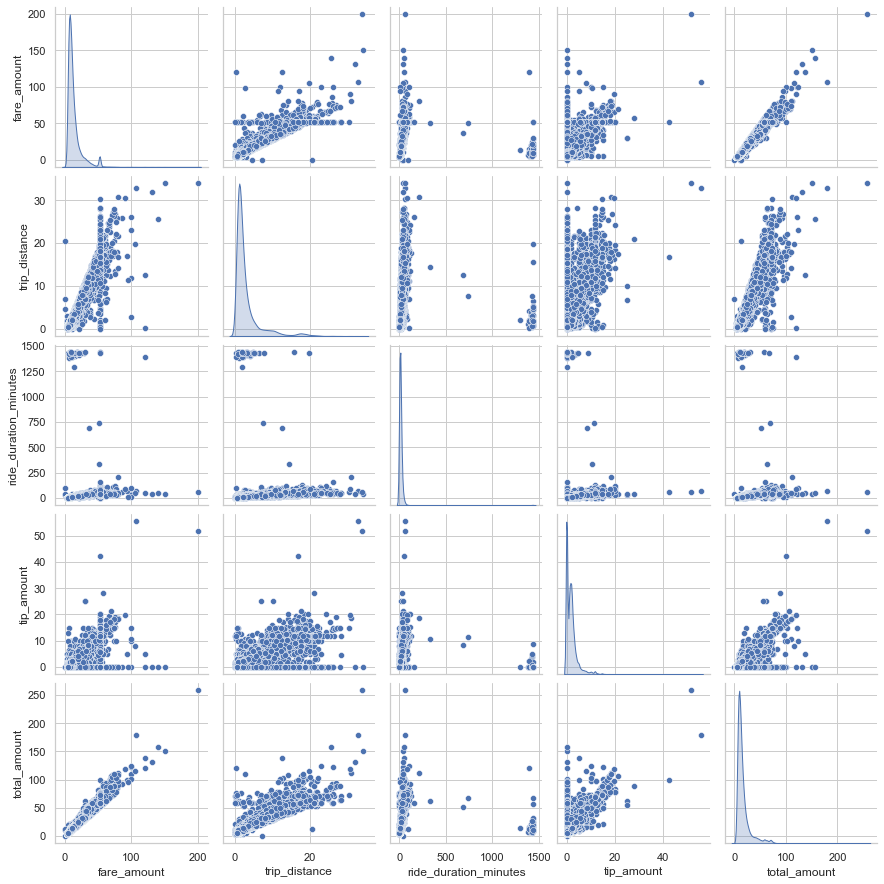

In [160]:
plt.figure(figsize=(20,10))

sns.pairplot(taxi_data[['fare_amount', 'trip_distance', 'ride_duration_minutes', 'tip_amount', 'total_amount', 'month', 'time_of_day']],
             diag_kind="kde", corner=False)
plt.show()

In [161]:
#Remove the rows with its ride duration greater than the Q3 (they are the outliers)
Q1 = taxi_data['ride_duration_minutes'].quantile(0.25)
Q3 = taxi_data['ride_duration_minutes'].quantile(0.75)
iqr = Q3 - Q1
upper_threshold = Q3 + (6 * iqr)
lower_threshold = Q3 - (6 * iqr)
print(upper_threshold, '   ' ,lower_threshold)

90.0     -54.0


<Figure size 1440x720 with 0 Axes>

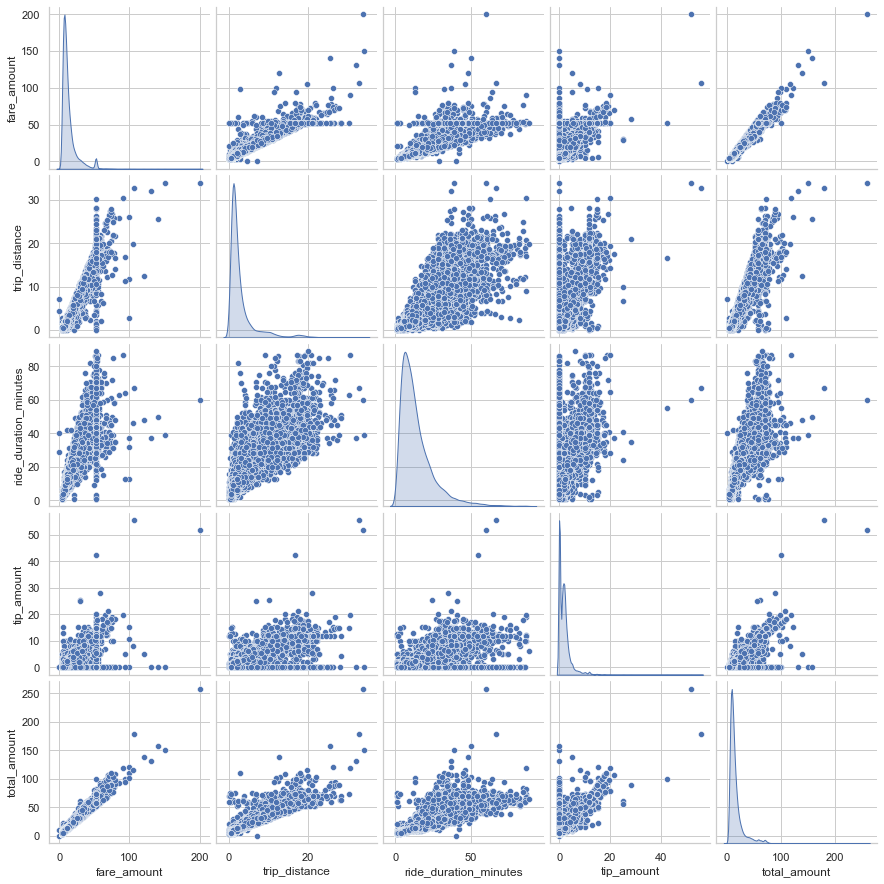

In [162]:
taxi_data_adj = taxi_data.copy()
taxi_data_adj = taxi_data_adj[(taxi_data_adj['ride_duration_minutes'] < upper_threshold) & 
                          (taxi_data_adj['ride_duration_minutes'] > lower_threshold)]

plt.figure(figsize=(20,10))

sns.pairplot(taxi_data_adj[['fare_amount', 'trip_distance', 'ride_duration_minutes',
                            'tip_amount', 'total_amount']],
             diag_kind="kde", corner=False)
plt.show()

In [163]:
#To get average distance and duration of ride, we need to group the taxi data trip journey first
taxi_data_adj.loc[:,'journey'] = taxi_data_adj['PULocationID'].astype(str) + ' ' + taxi_data_adj['DOLocationID'].astype(str)

grp_1 = taxi_data_adj.groupby('journey', as_index=False).trip_distance.mean().rename(columns={'trip_distance': 
                                                                                              'avg_trip_distance'})

taxi_data_adj = taxi_data_adj.merge(grp_1, on='journey', how='left')

#Testing it
taxi_data_adj[(taxi_data_adj['PULocationID']==100) & (taxi_data_adj['DOLocationID']==231)][['PULocationID','DOLocationID',
                                                                                            'avg_trip_distance']]

,PULocationID,DOLocationID,avg_trip_distance
0,100,231,3.521667
4833,100,231,3.521667
16411,100,231,3.521667
17896,100,231,3.521667
19504,100,231,3.521667
20313,100,231,3.521667


In [164]:
#For average trip duration
grp_2 = taxi_data_adj.groupby('journey', as_index = False)['ride_duration_minutes'].mean().rename(
    columns = {'ride_duration_minutes':'avg_ride_duration'})
taxi_data_adj = taxi_data_adj.merge(grp_2, on = 'journey', how = 'left')

In [165]:
taxi_data_adj['avg_trip_distance'] = taxi_data_adj['avg_trip_distance'].apply(lambda x: round(x,2))
taxi_data_adj['avg_ride_duration'] = taxi_data_adj['avg_ride_duration'].apply(lambda x: round(x,2))
taxi_data_adj

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime,journey,avg_trip_distance,avg_ride_duration
0,2,Morning,6,3.34,14,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,8,Sat,AM,March,2017-03-25 08:55:43,2017-03-25 09:09:47,100 231,3.52,22.33
1,1,Afternoon,1,1.80,26,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,2,Tue,PM,April,2017-04-11 14:53:28,2017-04-11 15:19:58,186 43,3.11,23.67
2,1,Morning,1,1.00,7,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7,Fri,AM,December,2017-12-15 07:26:56,2017-12-15 07:34:08,262 236,0.88,6.77
3,2,Afternoon,1,3.70,30,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,1,Sun,PM,May,2017-05-07 13:17:59,2017-05-07 13:48:14,188 97,3.70,30.00
4,2,Night,1,4.37,16,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,11,Sat,PM,April,2017-04-15 23:32:20,2017-04-15 23:49:03,4 112,4.44,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22387,2,Evening,3,0.61,3,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,5,Fri,PM,February,2017-02-24 17:37:23,2017-02-24 17:40:39,48 186,1.10,8.14
22388,2,Afternoon,1,16.71,40,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,4,Sun,PM,August,2017-08-06 16:43:59,2017-08-06 17:24:47,132 164,18.76,58.88
22389,2,Afternoon,1,0.42,4,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,2,Mon,PM,September,2017-09-04 14:54:14,2017-09-04 14:58:22,107 234,0.68,6.15
22390,2,Afternoon,1,2.36,11,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,12,Sat,PM,July,2017-07-15 12:56:30,2017-07-15 13:08:26,68 144,2.08,15.88


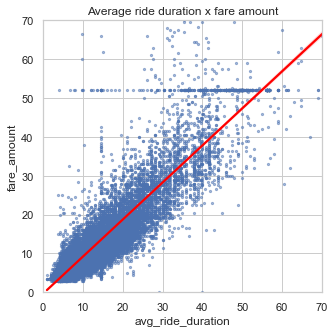

In [166]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=taxi_data_adj['avg_ride_duration'], y=taxi_data_adj['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Average ride duration x fare amount')
plt.show()

##### Out of all the continous variables the only show a bit of linearity with fare_amount suitable for independance variable is trip_distance but it is littered with numerous outliers.

##### I still constructed a linear regression with trip_distance, and the its results violated all the assumptions of the linear regression.

##### So I will try two types of regresssion; the first being a multiple linear regression with one having variables (VendorID, passenger_count, average_distance, average_duration, time_of_day) and the second being a random forest (VendorID, passenger_count, average_distance, average_duration, time_of_day, pickup_day_of_week, month) as X variables

### First model

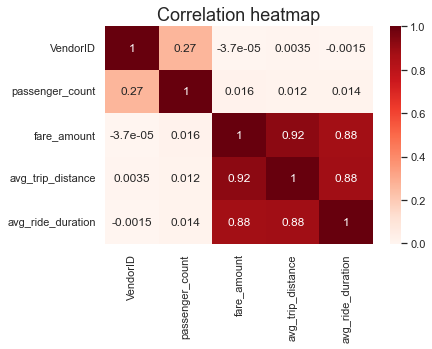

In [183]:
# First model and the correlation of all all variables
model_data_1 = taxi_data_adj[['VendorID','passenger_count', 'fare_amount','avg_trip_distance',
                              'avg_ride_duration','time_of_day']]

plt.figure(figsize = (6,4))
sns.heatmap(model_data_1.corr(method = 'pearson'), annot = True, cmap = 'Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

<Figure size 576x288 with 0 Axes>

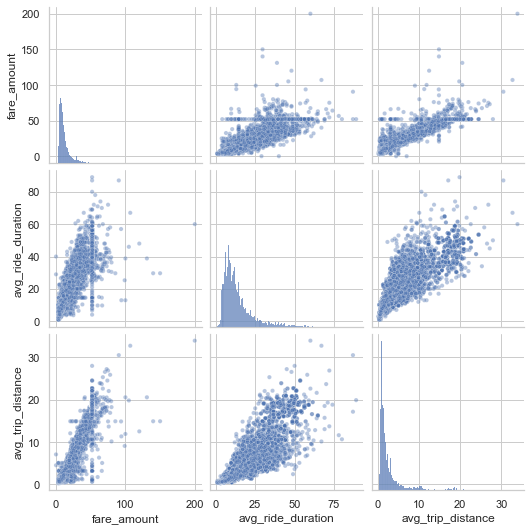

In [184]:
plt.figure(figsize =  (8,4))
sns.pairplot(model_data_1[['fare_amount', 'avg_ride_duration', 'avg_trip_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             )
plt.show()

In [185]:
# Remove the target column from the features
X = model_data_1.drop(columns=['fare_amount'])
X['VendorID'] = X['VendorID'].astype(str)
X = pd.get_dummies(X, drop_first=True)

# Set y variable
y = model_data_1[['fare_amount']]

# Display first few rows
X.head()

,passenger_count,avg_trip_distance,avg_ride_duration,VendorID_2,time_of_day_Evening,time_of_day_Midnight,time_of_day_Morning,time_of_day_Night
0,6,3.52,22.33,1,0,0,1,0
1,1,3.11,23.67,0,0,0,0,0
2,1,0.88,6.77,0,0,0,1,0
3,1,3.70,30.00,1,0,0,0,0
4,1,4.44,14.00,1,0,0,0,1


In [186]:
# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [195]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

#train the model
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [196]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.876546656383871
R^2: 0.876546656383871
MAE: 2.0152058122743135
MSE: 14.139055914794746
RMSE: 3.760193600706584


In [197]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8688785268143688
R^2: 0.8688785268143688
MAE: 2.002916042368723
MSE: 14.26017625131696
RMSE: 3.776264854498021


In [169]:
model_data_2 = taxi_data[['VendorID','passenger_count','time_of_day',
                        'pickup_day_of_week','month', 'fare_amount']]

In [170]:

grouped = taxi_data.groupby('time_of_day').mean(numeric_only=True)[['trip_distance']]

grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

grouped_dict

{'Afternoon': 2.8790882044102206,
 'Evening': 2.8237759103641458,
 'Midnight': 3.3367227676484337,
 'Morning': 2.827343803935105,
 'Night': 3.162919075144509}

In [171]:
taxi_data.groupby('time_of_day').mean(numeric_only=True)['trip_distance']

time_of_day
Afternoon    2.879088
Evening      2.823776
Midnight     3.336723
Morning      2.827344
Night        3.162919
Name: trip_distance, dtype: float64

In [172]:
taxi_data[taxi_data['passenger_count'] == 0]

,VendorID,time_of_day,passenger_count,trip_distance,ride_duration_minutes,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,pickup_period,month,tpep_pickup_datetime,tpep_dropoff_datetime
1516,1,Afternoon,0,8.8,41,1,N,138,164,1,33.0,0.0,0.5,5.55,5.76,0.3,45.11,3,Tue,PM,November,2017-11-14 15:45:23,2017-11-14 16:26:38
1874,1,Afternoon,0,1.1,7,1,N,48,237,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,12,Sun,PM,December,2017-12-03 12:05:52,2017-12-03 12:13:51
1925,1,Midnight,0,0.8,4,1,N,48,48,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,3,Sat,AM,September,2017-09-09 03:44:45,2017-09-09 03:49:19
3352,1,Night,0,2.7,15,1,N,87,79,1,12.5,0.5,0.5,2.75,0.00,0.3,16.55,10,Mon,PM,December,2017-12-18 22:44:57,2017-12-18 23:00:24
4060,1,Afternoon,0,1.7,9,1,N,161,239,1,9.0,0.0,0.5,1.95,0.00,0.3,11.75,1,Mon,PM,November,2017-11-27 13:08:01,2017-11-27 13:17:55
4919,1,Afternoon,0,3.1,22,1,N,163,114,1,15.5,0.0,0.5,4.05,0.00,0.3,20.35,2,Sat,PM,December,2017-12-16 14:59:17,2017-12-16 15:21:59
5563,1,Evening,0,1.3,11,1,N,164,233,1,9.0,0.0,0.5,1.95,0.00,0.3,11.75,5,Mon,PM,September,2017-09-04 17:40:00,2017-09-04 17:51:52
5603,1,Afternoon,0,4.2,21,1,N,230,211,1,18.0,0.0,0.5,3.75,0.00,0.3,22.55,12,Sun,PM,December,2017-12-17 12:18:49,2017-12-17 12:40:45
5668,1,Evening,0,1.0,10,1,N,211,249,1,8.0,0.0,0.5,1.50,0.00,0.3,10.30,7,Sat,PM,December,2017-12-16 19:50:12,2017-12-16 20:00:30
5767,1,Afternoon,0,10.4,38,1,N,113,138,1,34.0,0.0,0.5,8.10,5.76,0.3,48.66,3,Wed,PM,October,2017-10-04 15:17:52,2017-10-04 15:56:26


In [173]:
taxi_data.groupby('time_of_day').mean(numeric_only=True)[['trip_distance']]

,trip_distance
time_of_day,
Afternoon,2.879088
Evening,2.823776
Midnight,3.336723
Morning,2.827344
Night,3.162919


<function matplotlib.pyplot.show(close=None, block=None)>

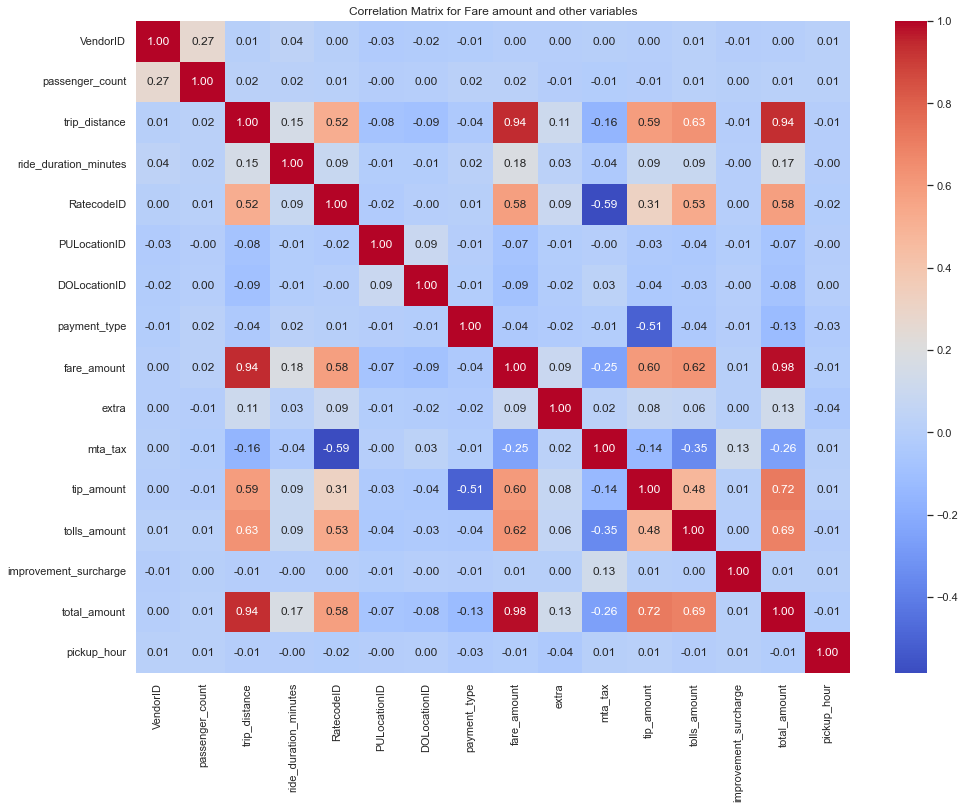

In [174]:
#Time to show the correlation of all the variables to fare_amount
plt.figure(figsize = (16,12))
corr_matrix_3 = taxi_data.corr()
sns.heatmap(corr_matrix_3, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title('Correlation Matrix for Fare amount and other variables')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

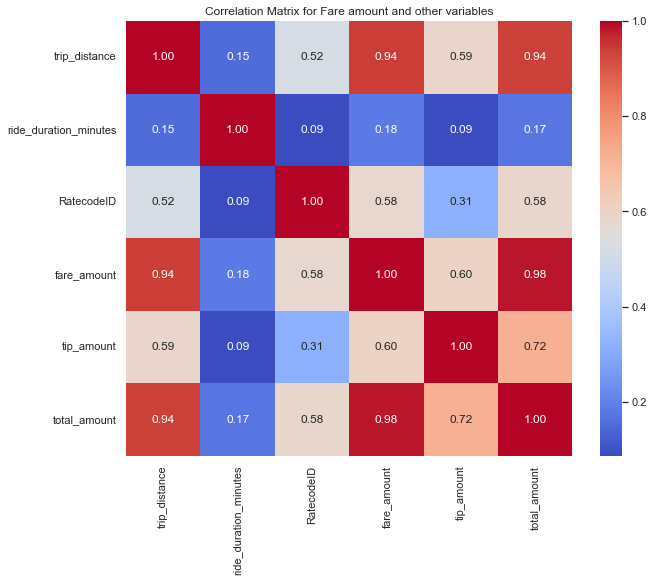

In [175]:
#Show clearly the correlation of all the suspected important numeric variables to fare_amount
plt.figure(figsize = (10,8))
corr_matrix_2 = taxi_data[['trip_distance','ride_duration_minutes','RatecodeID',
                           'fare_amount','tip_amount','total_amount',
                           ]]
corr_matrix_2 = corr_matrix_2.corr()
sns.heatmap(corr_matrix_2, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title('Correlation Matrix for Fare amount and other variables')
plt.show

In [176]:
model_data = taxi_data[['fare_amount','trip_distance','tip_amount','time_of_day', 'pickup_day_of_week',
                         'month']]

model_data = pd.get_dummies(model_data, columns = ['time_of_day', 
                                                   'pickup_day_of_week','month'], drop_first = True)
model_data

,fare_amount,trip_distance,tip_amount,time_of_day_Evening,time_of_day_Midnight,time_of_day_Morning,time_of_day_Night,pickup_day_of_week_Mon,pickup_day_of_week_Tue,pickup_day_of_week_Wed,pickup_day_of_week_Thu,pickup_day_of_week_Fri,pickup_day_of_week_Sat,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,13.0,3.34,2.76,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,16.0,1.80,4.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.5,1.00,1.45,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,20.5,3.70,6.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,16.5,4.37,0.00,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,4.0,0.61,0.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
22695,52.0,16.71,14.64,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
22696,4.5,0.42,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22697,10.5,2.36,1.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
